In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Global_stores.csv")

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.shape

(51290, 21)

In [5]:
# Checking the type of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [6]:
# Displaying descriptive statistics for numeric data
print("Descriptive Statistics:")
print(df.describe())


Descriptive Statistics:
           quantity      discount        profit  shipping_cost          year
count  51290.000000  51290.000000  51290.000000   51290.000000  51290.000000
mean       3.476545      0.142908     28.641740      26.375915   2012.777208
std        2.278766      0.212280    174.424113      57.296804      1.098931
min        1.000000      0.000000  -6599.978000       0.000000   2011.000000
25%        2.000000      0.000000      0.000000       2.610000   2012.000000
50%        3.000000      0.000000      9.240000       7.790000   2013.000000
75%        5.000000      0.200000     36.810000      24.450000   2014.000000
max       14.000000      0.850000   8399.976000     933.570000   2014.000000


In [7]:
# Removing duplicate rows
df = df.drop_duplicates()
print("DataFrame After Removing Duplicates:")
print(df)


DataFrame After Removing Duplicates:
              order_id  order_date ship_date       ship_mode  \
0         AG-2011-2040    1/1/2011  6/1/2011  Standard Class   
1        IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
2         HU-2011-1220    1/1/2011  5/1/2011    Second Class   
3      IT-2011-3647632    1/1/2011  5/1/2011    Second Class   
4        IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
...                ...         ...       ...             ...   
51285   CA-2014-115427  31-12-2014  4/1/2015  Standard Class   
51286     MO-2014-2560  31-12-2014  5/1/2015  Standard Class   
51287   MX-2014-110527  31-12-2014  2/1/2015    Second Class   
51288   MX-2014-114783  31-12-2014  6/1/2015  Standard Class   
51289   CA-2014-156720  31-12-2014  4/1/2015  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Cons

### EDA

In [8]:
# Displaying descriptive statistics for numeric data
print("Descriptive Statistics:")
print(df.describe())

# Removing duplicate rows
df = df.drop_duplicates()
print("DataFrame After Removing Duplicates:")
print(df)

# Identifying missing values
print("Missing Values (Boolean):")
print(df.isnull())

print("Count of Missing Values in Each Column:")
print(df.isnull().sum())

print("Total Number of Missing Values:")
print(df.isnull().sum().sum())

# Identifying valid (non-missing) data
print("Valid Data (Boolean):")
print(df.notnull())

print("Count of Valid Data in Each Column:")
print(df.notnull().sum())

print("Total Number of Valid Data Points:")
print(df.notnull().sum().sum())

# Filling missing values with a specific value (e.g., 0)
df_filled = df.fillna(0)
print("DataFrame After Filling Missing Values with 0:")
print(df_filled)

# Retrieving column and row labels
print("Column Labels:")
print(df_filled.columns)

print("Row Index Labels:")
print(df_filled.index)

Descriptive Statistics:
           quantity      discount        profit  shipping_cost          year
count  51290.000000  51290.000000  51290.000000   51290.000000  51290.000000
mean       3.476545      0.142908     28.641740      26.375915   2012.777208
std        2.278766      0.212280    174.424113      57.296804      1.098931
min        1.000000      0.000000  -6599.978000       0.000000   2011.000000
25%        2.000000      0.000000      0.000000       2.610000   2012.000000
50%        3.000000      0.000000      9.240000       7.790000   2013.000000
75%        5.000000      0.200000     36.810000      24.450000   2014.000000
max       14.000000      0.850000   8399.976000     933.570000   2014.000000
DataFrame After Removing Duplicates:
              order_id  order_date ship_date       ship_mode  \
0         AG-2011-2040    1/1/2011  6/1/2011  Standard Class   
1        IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
2         HU-2011-1220    1/1/2011  5/1/2011    Second

In [9]:
# Ensuring numeric columns before calculating IQR
# Convert numeric-looking strings to numeric types if needed
df_filled = df.copy()
numeric_columns = df_filled.select_dtypes(include=['float64', 'int64']).columns

# Check if any numeric-looking columns are stored as strings
for col in df_filled.columns:
    if df_filled[col].dtype == 'object':  # If column is of type 'object'
        # Attempt to convert to numeric
        df_filled[col] = pd.to_numeric(df_filled[col], errors='coerce')

# Now re-identify numeric columns after conversion
numeric_columns = df_filled.select_dtypes(include=['float64', 'int64']).columns

# Calculation of IQR for numeric columns only
Q1 = df_filled[numeric_columns].quantile(0.25)
Q3 = df_filled[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers using the IQR rule
outlier_mask = ~((df_filled[numeric_columns] < (Q1 - 1.5 * IQR)) | 
                 (df_filled[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Keeping rows without outliers
df_cleaned = df_filled[outlier_mask]

# Displaying the cleaned data
print("Original Data Shape:", df.shape)
print("Cleaned Data Shape:", df_cleaned.shape)


Original Data Shape: (51290, 21)
Cleaned Data Shape: (35978, 21)


In [10]:
# Permanently removing a column if exists (e.g., 'Observation')
if 'Observation' in df_filled.columns:
    df_filled.drop(['Observation'], axis=1, inplace=True)
    print("Updated Column Labels After Dropping 'Observation':")
    print(df_filled.columns)

# Calculation of IQR for outlier detection
Q1 = df_filled.quantile(0.25)
Q3 = df_filled.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers using the IQR rule
outlier_mask = ~((df_filled < (Q1 - 1.5 * IQR)) | (df_filled > (Q3 + 1.5 * IQR))).any(axis=1)
df_no_outliers = df_filled[outlier_mask]

# Displaying results
print("Original Data:")
print(df_filled)

print("\nData After Removing Outliers:")
print(df_no_outliers)

# Displaying descriptive statistics for the cleaned data
print("Descriptive Statistics After Cleaning:")
print(df_no_outliers.describe())

Original Data:
       order_id  order_date  ship_date  ship_mode  customer_name  segment  \
0           NaN         NaN        NaN        NaN            NaN      NaN   
1           NaN         NaN        NaN        NaN            NaN      NaN   
2           NaN         NaN        NaN        NaN            NaN      NaN   
3           NaN         NaN        NaN        NaN            NaN      NaN   
4           NaN         NaN        NaN        NaN            NaN      NaN   
...         ...         ...        ...        ...            ...      ...   
51285       NaN         NaN        NaN        NaN            NaN      NaN   
51286       NaN         NaN        NaN        NaN            NaN      NaN   
51287       NaN         NaN        NaN        NaN            NaN      NaN   
51288       NaN         NaN        NaN        NaN            NaN      NaN   
51289       NaN         NaN        NaN        NaN            NaN      NaN   

       state  country  market  region  ...  category  sub_ca

In [11]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')


In [12]:
# 1. Convert the Date column to a datetime object for trend analysis
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    print("Date column converted to datetime:")
    print(df['order_date'])


Date column converted to datetime:
0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51285          NaT
51286          NaT
51287          NaT
51288          NaT
51289          NaT
Name: order_date, Length: 51290, dtype: datetime64[ns]


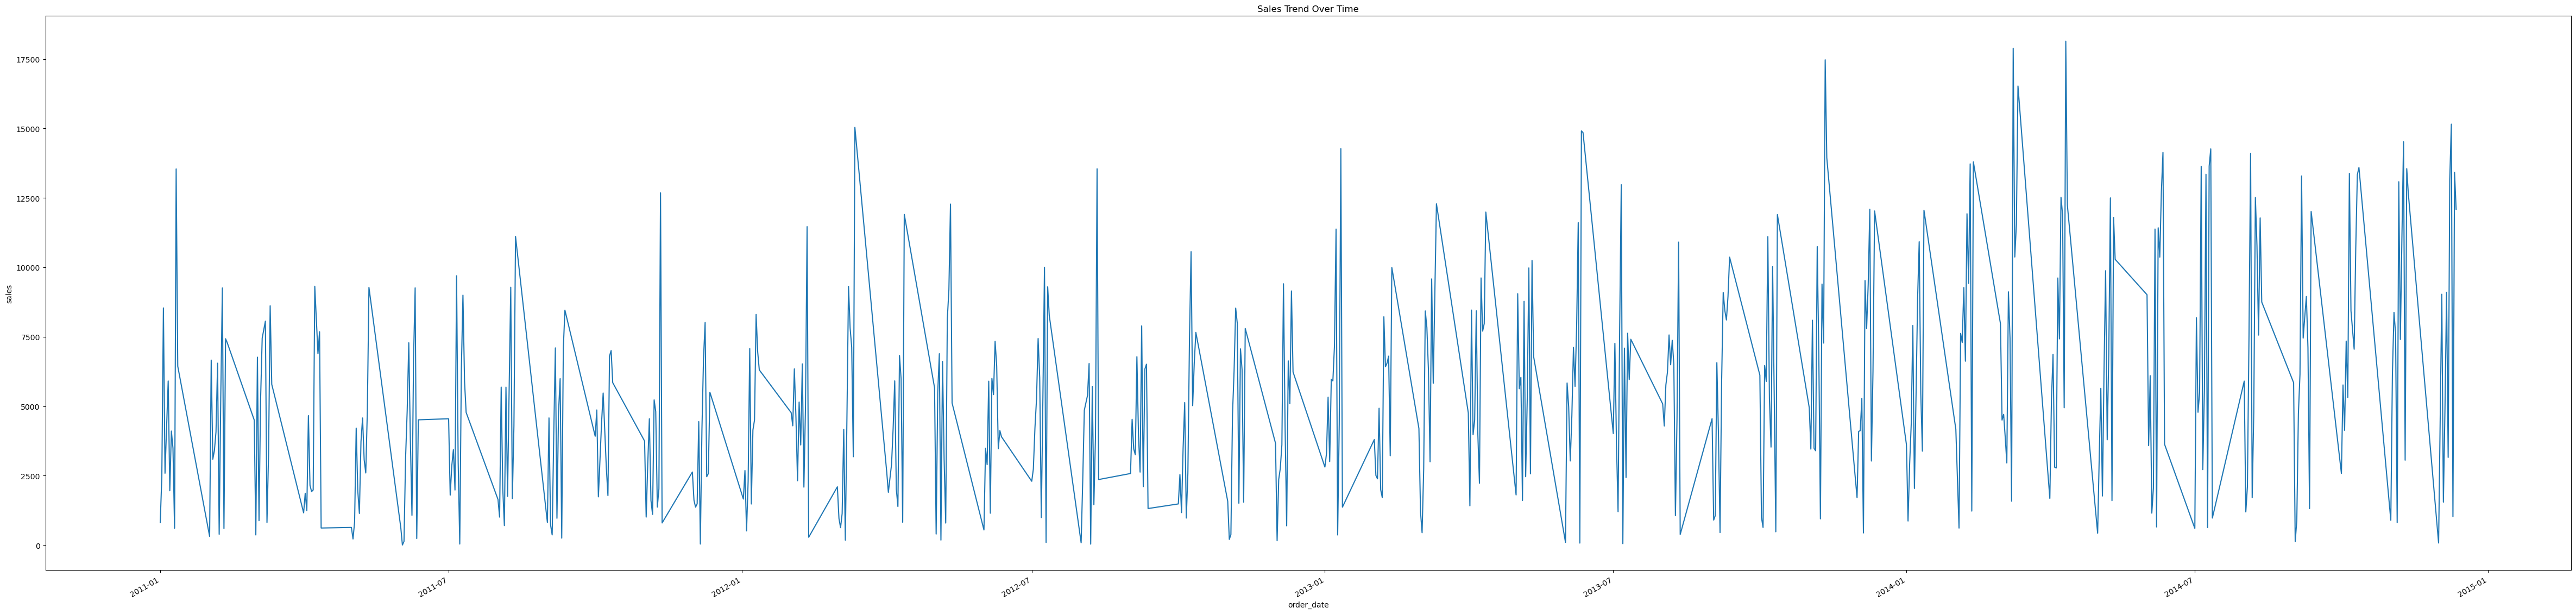

In [13]:
# 2. Plot time series graphs to observe trends in Sales over time
if 'order_date' in df.columns and 'sales' in df.columns:
    plt.figure(figsize=(60, 15))
    df.groupby('order_date')['sales'].sum().plot(title='Sales Trend Over Time')
    plt.xlabel('order_date')
    plt.ylabel('sales')
    plt.show()

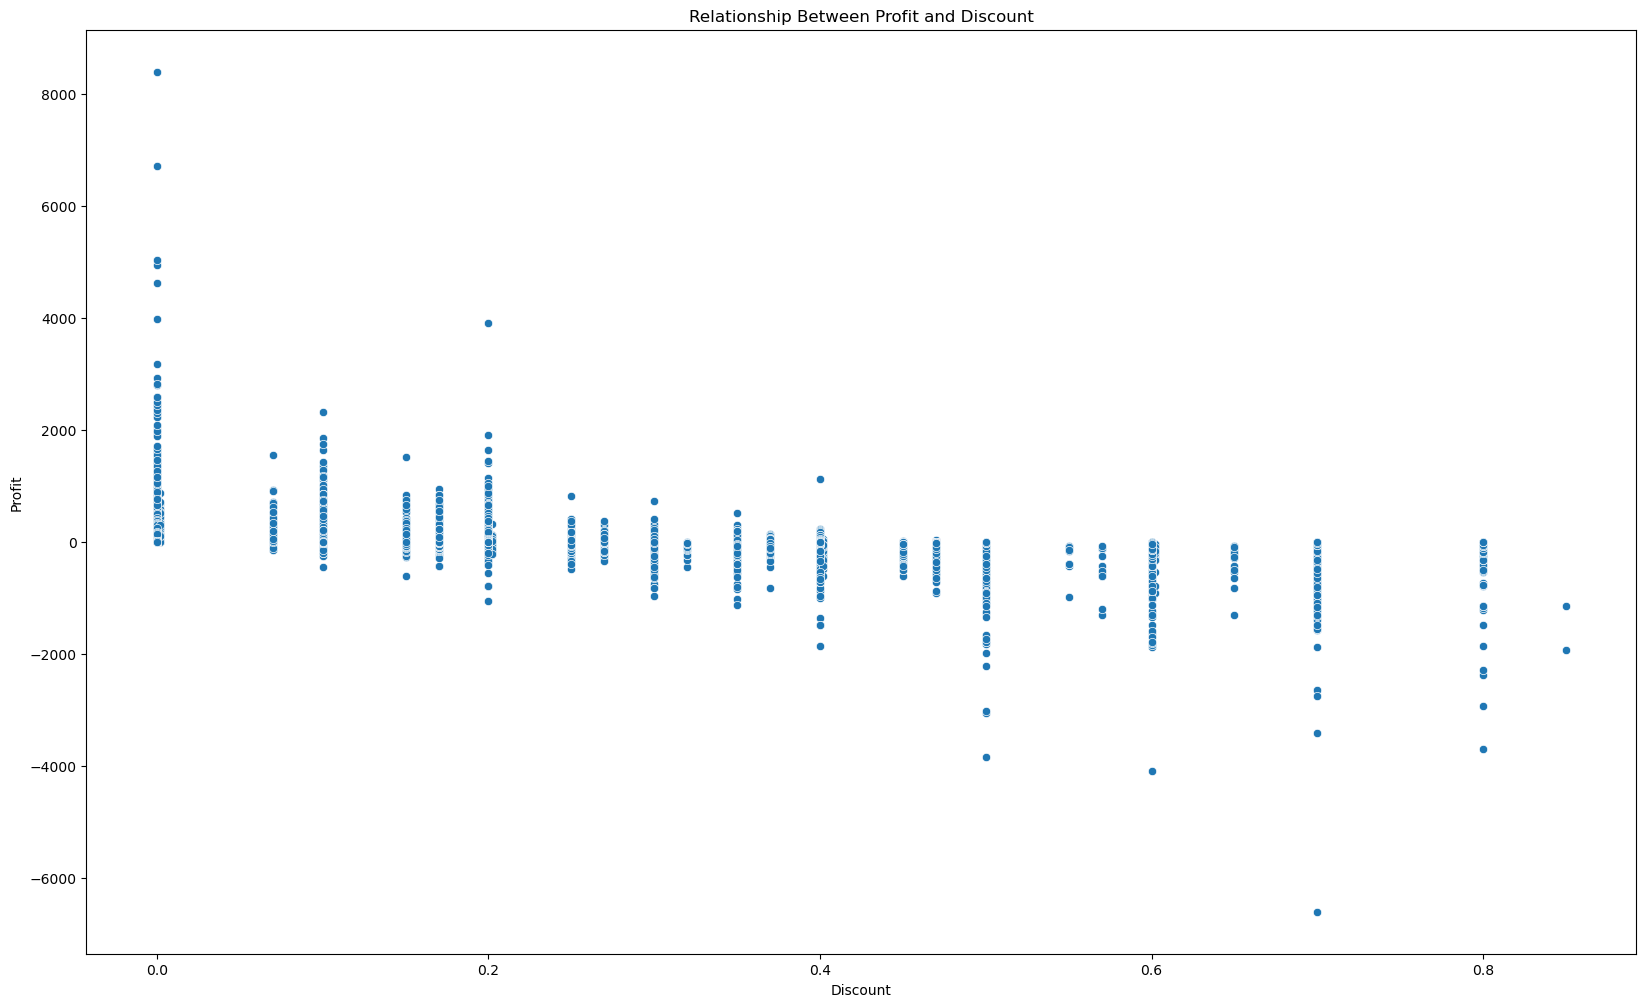

In [14]:
# 3. Use scatter plots to study the relationship between Profit and Discount
if 'profit' in df.columns and 'discount' in df.columns:
    plt.figure(figsize=(20, 12))
    sns.scatterplot(data=df, x='discount', y='profit')
    plt.title('Relationship Between Profit and Discount')
    plt.xlabel('Discount')
    plt.ylabel('Profit')
    plt.show()


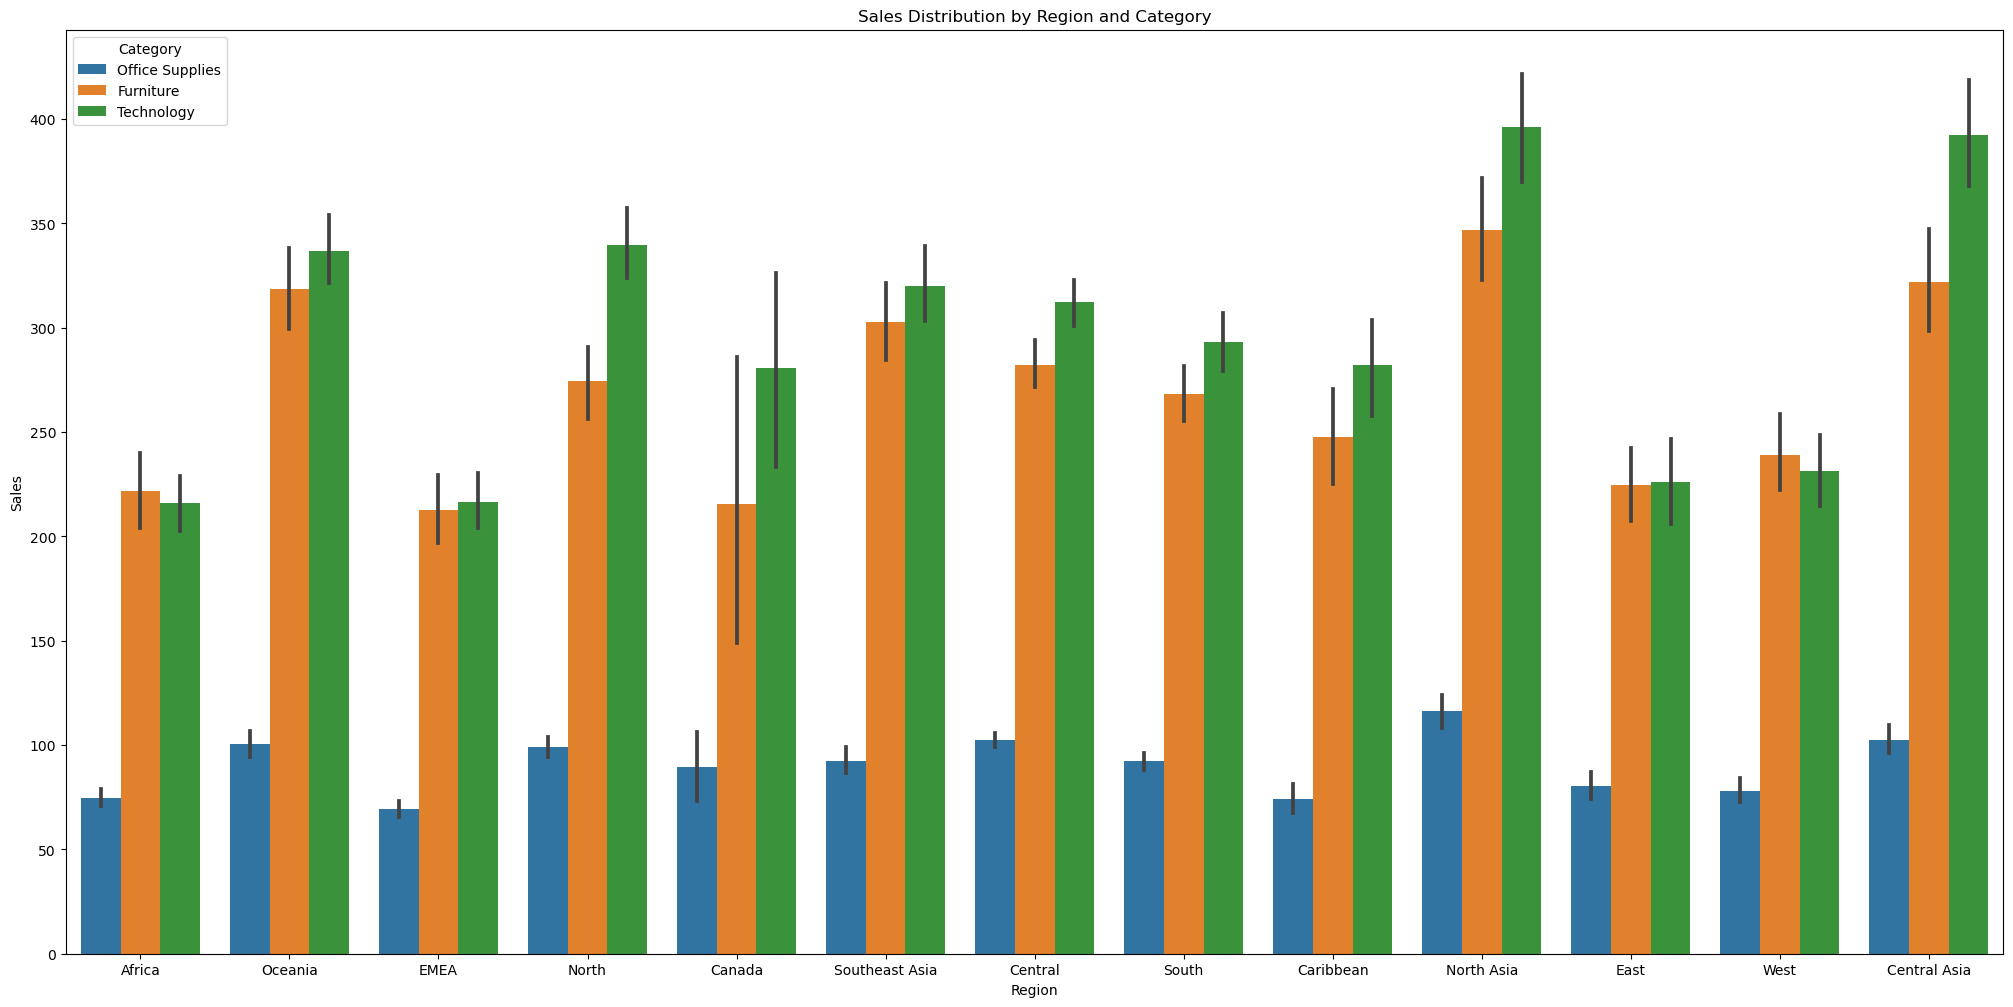

In [15]:
# 4. Visualize sales distribution by Region and Category using bar plots or pie charts
if 'region' in df.columns and 'category' in df.columns and 'sales' in df.columns:
    plt.figure(figsize=(25, 12))
    sns.barplot(data=df, x='region', y='sales', hue='category')
    plt.title('Sales Distribution by Region and Category')
    plt.xlabel('Region')
    plt.ylabel('Sales')
    plt.legend(title='Category')
    plt.show()

In [16]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

### Linear Regression

Model Coefficients: [ 0.60631098 17.66924626]
Model Intercept: 149.64768928317957
R² Score: 0.06
Mean Squared Error (MSE): 37421.41


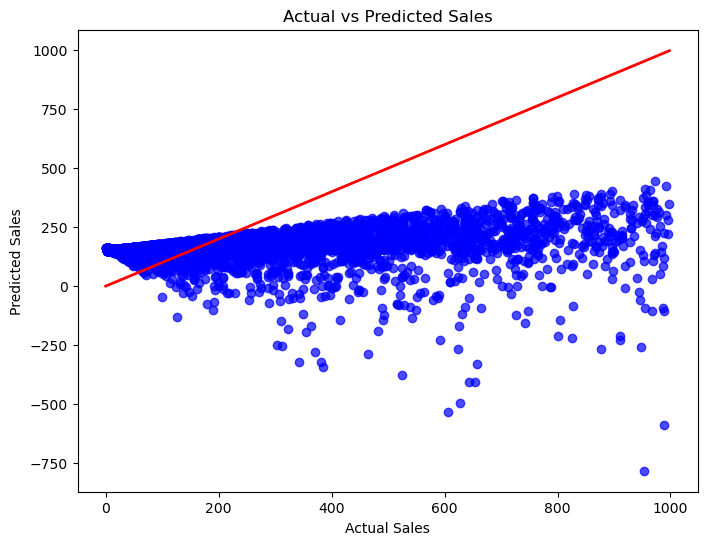

In [17]:
# Importing necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensuring the required columns exist in the dataset
if {'profit', 'discount', 'sales'}.issubset(df.columns):
    
    # Dropping rows with missing values in relevant columns
    df_model = df[['profit', 'discount', 'sales']].dropna()
    
    # Splitting data into features (X) and target (y)
    X = df_model[['profit', 'discount']]
    y = df_model['sales']
    
    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Training the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Making predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluating the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Displaying results
    print("Model Coefficients:", model.coef_)
    print("Model Intercept:", model.intercept_)
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    # Visualizing the actual vs predicted sales
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title('Actual vs Predicted Sales')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.show()
else:
    print("The required columns ('Profit', 'Discount', 'Sales') are not present in the dataset.")


In [20]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'profit_discount'],
      dtype='object')

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

def preprocess_data(df):
    """
    Preprocesses the data by handling missing values and scaling features.

    Args:
        df: The input DataFrame.

    Returns:
        A tuple containing the preprocessed features (X) and target variable (y).
    """

    # Handle missing values 
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    df['sales'] = imputer.fit_transform(df[['sales']])  

    # Feature engineering (example: create interaction term)
    df['profit_discount'] = df['profit'] * df['discount']

    # Select features and target
    X = df[['profit', 'discount', 'profit_discount']] 
    y = df['sales']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return r2, mse

if __name__ == "__main__":
    
    # Preprocess the data
    X, y = preprocess_data(df)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate different models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso()
    }

    for model_name, model in models.items():
        r2, mse = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
        print(f"{model_name}:")
        print(f"  R-squared: {r2:.2f}")
        print(f"  Mean Squared Error: {mse:.2f}")
        print()

    # Hyperparameter tuning (example with Ridge Regression)
    param_grid = {'alpha': [0.1, 1.0, 10.0]} 
    grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_r2, best_mse = train_and_evaluate_model(best_model, X_train, y_train, X_test, y_test)
    print(f"Best Ridge Regression Model:")
    print(f"  R-squared: {best_r2:.2f}")
    print(f"  Mean Squared Error: {best_mse:.2f}")
    print(f"  Best alpha: {grid_search.best_params_['alpha']}")

Linear Regression:
  R-squared: 0.06
  Mean Squared Error: 35466.28

Ridge Regression:
  R-squared: 0.06
  Mean Squared Error: 35466.23

Lasso Regression:
  R-squared: 0.06
  Mean Squared Error: 35444.88

Best Ridge Regression Model:
  R-squared: 0.06
  Mean Squared Error: 35465.80
  Best alpha: 10.0


Here’s a category-wise breakdown of the insights and recommendations for improving sales:

1. **Profit Margin:**
   - **Insight:** Products with higher profit margins tend to generate better sales.
   - **Recommendation:** Focus on promoting high-margin products and review cost structures to improve profitability.

2. **Discount Strategy:**
   - **Insight:** The relationship between discounts and sales can vary. Excessive discounts may reduce perceived value.
   - **Recommendation:** Implement targeted discounts based on product demand and customer segments, and test various discount strategies to find the most effective balance.

3. **Region-Specific Sales:**
   - **Insight:** Certain regions may perform better than others, indicating a need for localized marketing efforts.
   - **Recommendation:** Tailor promotions and product offerings to high-performing regions, while addressing underperforming areas with region-specific strategies.

4. **Product Categories:**
   - **Insight:** Some categories may be more responsive to discounts, while others might benefit more from higher margins.
   - **Recommendation:** Analyze the performance of each category to create tailored promotions. Focus on high-demand categories with optimized pricing strategies to increase overall sales.

By aligning strategies with these categories, businesses can optimize their sales efforts and improve profitability.